In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Линейная регрессия

Это наша первая практика, в которой мы коснемся вопросов, связанных с машинным обучением. Запомните, в машинном обучении **данные** - всему голова! Поэтому создадим немного данных, чтобы на них разбираться.

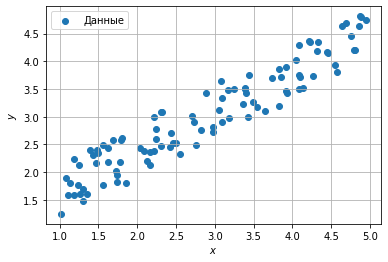

In [2]:
n_points = 100

real_W = [1, 0.7]
X_data = 4*np.sort(np.random.rand(n_points, 1), axis=0)+1
noize = 1*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_render = real_W[0] + real_W[1]*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

Отлично! Вот мы имеет данные, но что это и как с этим работать? Эти данные нами сгенерированы, но в реальных данных всему есть назначение, поэтому и мы зададимся некоторым описанием:
- $x$ - качество продукта [безразмерный показатель];
- $y$ - цена продукта [у.е.].

В виде таблицы это бы выглядело вот так:

In [3]:
pd.DataFrame({
    'quality': X_data[:,0],
    'price': y_data
}).head()

,quality,price
0,1.022088,1.246891
1,1.082338,1.894047
2,1.101677,1.585530
3,1.137554,1.804859
4,1.180909,2.234203


Теперь данные имеют смысл. Каждая точка на графике (запись в таблице) - отдельный продукт из базы и мы видим, что с увеличением качества продукта растет и цена - это и есть **зависимость** в данных. Зависимость переменной $y$ от переменной $x$, а значит можем назвать эти переменные так:
- $y$ - зависимая переменная;
- $x$ - независимая переменная.

Еще мы можем видеть, что в данных бывают случаи, когда качество ниже, но цена выше! Что это такое? Это статистика! 

Если рассмотреть две отдельные точки, то можно попасть на такие, что качество выше, но цена ниже. Тогда мы делаем вывод (по двум точкам), что выше качество - ниже цена. **Плохо!**

Статистика по большому количеству данных позволяет смотреть не на отдельные точки, а на зависимость в общем. Такой взгляд показывает, как дела обстоят на самом деле, а не в случае двух отдельных продуктов.

Немного формализуя, можно сказать, что данные представляют собой следующий вид:
$$
данные = зависимости + шум
$$

Здесь зависимость - это то, что ценно и полезно для тех, кто хочет использовать данные (во благо или во зло уже другой вопрос), а шум - отклонения, разброс, выбросы и другие девиации в данных.

Зависимости бывают разные и спасибо математике за возможность описать не только словами, но и даже формулами (аналитически). Логарифмическая, полиномиальная, экспоненциальная - много разных, но мы смотрим на нашу.

Что если попробуем провести две прямых линии через эти данные? Пробуем!

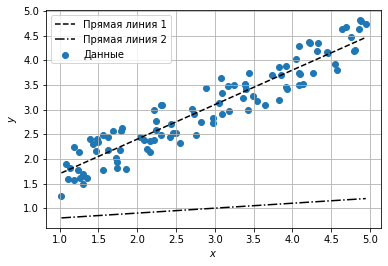

In [4]:
X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y1 = real_W[0] + real_W[1]*X_render
y2 = 0.7 + 0.1*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y1, 'k--', label='Прямая линия 1')
plt.plot(X_render, y2, 'k-.', label='Прямая линия 2')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

Хм, разбираемся:
- Линия 1 - проходит через данные так, что общая зависимость в данных более менее похожа на нее;
- Линия 2 - очень сильно смещена от данных и имеет другой рост значения (угол наклона), нежели данные.

Делаем вывод, что линия 1 лучше **описывает** данные, чем линия 2. В чем разница между линиями? У каждой свои коэффициенты $k$ и $b$.

> Если кто запамятовал уравнения прямой линии: $y=kx+b$

То есть, мы сейчас визуально убедились, что зависимость в данных имеет линейный характер, так как по прямой линии 1 рост идет таким же темпом, а отклонения данных от линии сохраняются более менее равномерно.

Если зависимость в данных имеет линейный характер, значит и описать ее можно уравнением прямой линии. Но это должна быть не просто любая прямая линия (как уже убедились), а с такими коэффициентами, при которых линия будет идти в соответсвии с зависимостью в данных.

Так мы подошли к понятию **задачи определения регрессии**.

> **Задача определения регрессии** - определение аналитического описания (формулы) зависимости зависимой переменной $y$ от независимых переменных $x$ (да, может быть несколько переменных, например, качество и срок годности).

В машинном обучении, решая задачу определения регрессии, мы ищем такую функцию, которая максимально точно опишет зависимость в данных.

В нашем случае данные имеют линейную зависимость. Поэтому мы будем использовать **модель линейной регрессии**.

Что такое **модель**? В машинном обучении модель - более общее понятие функции/алгоритма. Линейная зависимость определяется уравнением прямой, экспоненциальная - уравнением экспоненты, но есть более сложные зависимости, которые описываются не уравнением, а более сложными вещами (типа решающих деревьев).

Так вот, модель линейной регрессии для нашего случая похожа на уравнение прямой:
$$
\hat{y} = b + k*x
$$

Модель имеет **параметры**, которые и характеризуют ее поведение. В случае линейной регрессии это и есть наши $k$ и $b$. Как мы видели, при одних параметрах модель "хорошо" описывает данные, а при других - "плохо". 

В уравнении $\hat{y}$ - **предсказание** модели. Данные, которые мы имеет $x$ и $y$ используются для **обучения**, а использование модели - **предсказать** цену на основе новых неизвестных ранее $x$ (новая оценка качества). Так как задача модели - отражать зависимость в данных, то предсказания должны также соответствовать общей зависимости.

Таким образом, после выбора модели мы должны произвести **обучение**. Если кратко, **обучение** - процесс изменения параметров (их еще называют весами модели) так, чтобы модель работала "хорошо" (в задаче регрессии - "хорошо" описывала закономерности в данных).


Резюмируя, имеем данные по продуктам и хотим решить задачу регрессии, видим линейную зависимость в данных, обучаем модель линейной регрессии и она уже по новым данным оценок качества сама предсказывает и устанавливает цену на продукты! Прекрасная автоматизация!

Если все понятно, то немного копнем поглубже. Обратите внимание, что параметры в нашей модели - это то, насколько качество влияет на цену ($k$) и смещение средней цены ($b$). Величину влияния качества на цену можно назвать весом качества, так как чем больше $k$, тем больше результарующая цена. 

Смещение нужно, чтобы подкорректировать работу модели. В наших данных нет записей при $x=0$, но если посмотреть общую тенденцию, то при $x=0$, $y \neq 0$. Да и в уравнении прямой всегда было смещение, ведь иначе все линии проходили бы через точку $(0, 0)$ - центр координат.

Так как $k$ мы обозвали весом, то правильнее переопределить переменную. Ведь это не просто уравнение прямой, а целая модель линейной регрессии! Назовем это так:
$$
\hat{y} = w_0 + w*x
$$

где $w_0$ - константное смещение, $w$ - вес переменной $x$.

# Функция предсказания

Для нашего случая, когда мы имеем одну независимую переменную (признак) в данных:

$$
\hat{y} = w_0 + w*x
$$

Теперь распространим на случай, когда в данных переменная $y$ зависит от двух принаков: $x_1$ (качество продукта) и $x_2$ (срок годности):

$$
\hat{y} = w_0 + w_1*x_1 + w_2*x_2
$$

Как видно, модель линейной регрессии каждому признаку присваивает вес, поэтому можно записать общий вид модели:

$$
\hat{y} = h_W(x)= w_0 + \sum_{i=1}^{m}w_i*x_i
$$

> $h_W(x)$ - функция предсказания модели, которая имеет веса для каждого признака

где $m$ - кол-во признаков в данных, $w_i$ - вес признака $x_i$, $w_0$ - константное смещение.

> Еще раз для закрепления, модель линейной регрессии - линейное уравнение, в котором каждый признак данных имеет свой вес. В ходе обучения на данных настраиваются веса каждого признака и смещение модели, чтобы модель повторяла зависимость в данных.

Отлично, теперь мы можем перейти к векторному представлению, так как здесь явно проглядывается формула скалярного произведения!

Зададим признаки и веса в виде векторов:
$$
X = 
\begin{bmatrix}
1 & x_1 & \dots & x_{m-1} & x_m
\end{bmatrix} \\
W = 
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{m-1} \\
w_m
\end{bmatrix}
$$

Теперь мы можем записать представление модели в векторной форме: 
$$
h_W(X)=XW
$$

> Здесь $h_W(X)$ означает функцию предсказания модели, в ней фигурируют веса $W$ и входные данные $X$. Результатом этой функции является предсказание модели $\hat{y}$.

Такой вид и запомним, так как он больше вообще не изменится!

Мы рассмотрели случай, когда у нас есть одна запись в данных и несколько признаков, но модели машинного обучения должны строиться на основе множества данных, чтобы вычислять основные зависимости, поэтому обязательно необходимо понимать представление, когда имеются $n$ записей данных. Для такого случая, все, что нам надо исправить в представлении - вектор $X$ превратится в матрицу:

$$
X = 
\begin{bmatrix}
1 & x^{(1)}_1 & \dots & x^{(1)}_{m-1} & x^{(1)}_m \\
1 & x^{(2)}_1 & \dots & x^{(2)}_{m-1} & x^{(2)}_m \\
\vdots & \vdots & \ddots & \vdots & \vdots  \\
1 & x^{(n)}_1 & \dots & x^{(n)}_{m-1} & x^{(n)}_m \\
\end{bmatrix}
$$

где $n$ - количество записей данных.

> Верхний индекс в нашем представлении означает номер записи в данных.

> Помните! Столбец единиц является спецификой для линейной регрессии, поэтому при работе с линейной регрессией и матричном умножении важно не забывать добавлять этот столбец!

И обратите внимание, что представление функции предсказания $h_W(X)$ вообще не поменялось! Только результатом функции является уже не скаляр, а вектор $\hat{y}$:

$$
\hat{y} = 
\begin{bmatrix}
\hat{y}^{(1)} \\
\hat{y}^{(2)} \\
\vdots \\
\hat{y}^{(n-1)} \\
\hat{y}^{(n)} \\
\end{bmatrix}
$$

---

Для пущего понимания разберем более подробно. Перемножение матриц/векторов делается по правилу "элемент строки левой матрицы умножаются на элементы столбца правой матрицы, складываются и размещаются в результирующей матрице на строке по индексам строки левой матрицы и столбца правой матрицы". 

В общем случае мы берем
$$
X^{(1)}=
\begin{bmatrix}
1 & x^{(1)}_1 & \dots & x^{(1)}_{m-1} & x^{(1)}_m
\end{bmatrix}
$$ 

и умножаем поэлементно на 

$$
W = 
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{m-1} \\
w_m
\end{bmatrix}
$$

то есть

$$
\hat{y}^{(1)} = X^{(1)}*W=
w_0 + w_1*x^{(1)}_1 + \dots + w_{m-1}*x^{(1)}_{m-1} + w_m*x^{(1)}_m 
$$

Так мы получаем результат для первой записи вектора предсказаний $\hat{y}^{(1)}$. При этом, матричное умножение позволяет получить результаты предсказаний для всех данных одной операций (что часто оптимизированно на процессорах и выполняется быстрее, чем проход циклом по каждой записи).

---

# Let`s get our hands dirty! (Начнем практиковаться)



Перед тем, как делать какие-либо реализации, необходимо посмотреть, в каком виде представлены наши данные. В данном случае мы имеет матрицу данных `X_data` и вектор истинных значений цены `y_data`. Для самого простого анализа отобразим размерности данных:

In [5]:
X_data.shape, y_data.shape

((100, 1), (100,))

Отлично, мы видим, что данные представлены имеют 100 записей (первая размерность) и всего один признак (вторая размерность). Вектор разметки (истинных значений) обычно представлен одной размерность.

После того, как мы знаем размерности, можно отобразить несколько данных из набора:

In [6]:
X_data[:3]

array([[1.02208847],
       [1.08233798],
       [1.10167651]])

In [7]:
y_data[:3]

array([1.24689111, 1.894047  , 1.58552954])

Для начала, нашей задачей является написать реализацию функции предсказания модели. Начнем мы со скалярного представления:

> Напомним, $\hat{y} = w_0 + w*x$

In [8]:
def predict_scalar_one(x, w0, w1):
    '''
    x - скалярное значение признака
    w0 - константное смещение
    w1 - вес признака
    '''
    # TODO - напишите код для вычисления предсказания по одной переменной
    y = w0 + x * w1
    return y

In [9]:
# TEST

# В таких проверочных блоках будет проверяться корректность
#   написания вами кода, так что если в блоке выпадает ошибка - не пугайтесь,
#   просто, вероятно, код делает не совсем правильные вещи

# assert - ключевое слово Python
#   если ему передан True - он просто ничего не делает
#   если False - то он выдаст ошибку AssertionError, 
#                   что означает проверка не пройдена

x = 1
w0 = 2
w1 = 3

assert predict_scalar_one(x, w0, w1) == 5

Теперь воспользуемся данной реализацией, достанем из данных значение признака, предскажем значение на основе случайно выбранных весов и сравним с истинным.

In [10]:
data_index = 0

x = X_data[data_index, 0]
y_true = y_data[data_index]
# Зададим для примера следующие веса
w0 = 3
w1 = 0.2

y_pred_sc = predict_scalar_one(x, w0, w1)
print(f'y_pred_sc = predict_scalar({x}, {w0}, {w1}) = {y_pred_sc}')
print(f'y_true = {y_true}')

y_pred_sc = predict_scalar(1.0220884684944096, 3, 0.2) = 3.2044176936988817
y_true = 1.2468911136328207


Как видно, предсказанное значение далековато от истинного. Теперь попрактикуемся в векторизации для случаев, когда у нас не один признак, а много, то есть $X = 
\begin{bmatrix}
x_1 & \dots & x_{m-1} & x_m
\end{bmatrix}$.

Напишите функцию предсказания для вектора признаков (одной записи в данных):

> Не забудьте, что на выходе мы должны получить скалярное значение, а не массив

In [11]:
def predict_one(X, W):
    '''
    X - вектор признаков [M]
    W - вектор весов [M+1]
    '''
    # TODO - напишите функцию предсказания
    X = np.concatenate(([1],X))
    y = X @ W
    return y

In [12]:
# TEST

# Запись в данных имеет, например, три [M = 3] признака
X = np.array([1, 2, 0])
# Веса модели [M+1]
W = np.array([3, 2, 1, 1])
y_pred = predict_one(X, W)

assert not isinstance(y_pred, (list, tuple, np.ndarray))
assert y_pred == 7

In [13]:
# Вектор наших случайно выбранных весов
selected_W = np.array([w0, w1])
X = X_data[data_index]
y_pred_one = predict_one(X, selected_W)
print(f'y_pred = predict_one({X}, {selected_W}) = {y_pred_one}')

y_pred = predict_one([1.02208847], [3.  0.2]) = 3.2044176936988817


Соответственно, проверка на равенство должна пройти:

In [14]:
assert y_pred_sc==y_pred_one

Мы рассмотрели случай, когда у нас всего одна запись в данных. Теперь сыграем серьезно - напишем функцию предсказания для набора данных:

In [15]:
def predict(X, W):
    '''
    X - 2D матрица признаков [N, M]
    W - вектор весов [M+1]
    '''
    arr_ones = np.ones((len(X),1), dtype=int)

    # TODO - напишите функцию предсказания
    y = np.concatenate((arr_ones, X), axis=1) @ W

    return y

In [16]:
# TEST
X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5]
])
W = np.array([3, 2, 1, 2])
y_pred = predict(X, W)

assert np.all(y_pred == np.array([13, 18, 23]))
assert len(y_pred.shape) == 1
assert y_pred.shape[0] == 3

Теперь достанем часть данных и сделаем предсказание в цикле векторной функцией и сравним с нашей матричной реализацией:

In [17]:
data_len = 10

X = X_data[10:10+data_len]
y_true = y_data[10:10+data_len]

In [18]:
X

array([[1.29820257],
       [1.35397001],
       [1.39068846],
       [1.43156571],
       [1.46347624],
       [1.47837698],
       [1.48815294],
       [1.55797544],
       [1.5636969 ],
       [1.62397808]])

In [19]:
# Для случая нескольких записей при работе без матриц придется проходить
#   циклом по каждой записи
y_pred_sc = []
for x in X:
    y = predict_one(x, selected_W)
    y_pred_sc.append(y)

y_pred_sc = np.array(y_pred_sc)

In [20]:
y_pred_sc

array([3.25964051, 3.270794  , 3.27813769, 3.28631314, 3.29269525,
       3.2956754 , 3.29763059, 3.31159509, 3.31273938, 3.32479562])

In [21]:
y_pred = predict(X, selected_W)

In [22]:
y_pred

array([3.25964051, 3.270794  , 3.27813769, 3.28631314, 3.29269525,
       3.2956754 , 3.29763059, 3.31159509, 3.31273938, 3.32479562])

In [23]:
print(f'ys_pred == ys_pred_sc -> {np.all(y_pred_sc==y_pred)}')

ys_pred == ys_pred_sc -> True


Отлично! У нас готова функция предсказания модели, которой можно передать набор данных, вектор весов и получить предсказанное значение!

# Визуализация предсказаний

Одним из полезных способов анализа является визуализация предсказаний модели. Для нашего случая это можно сделать без каких-либо предобработок, так как количество признаков небольшое.

In [24]:
def plot_model(X, y_pred, y_true):
    plt.scatter(X, y_data, label='Данные')
    plt.plot(X, y_pred, 'k--', label='Предсказание модели')
    plt.ylabel('$Y$')
    plt.xlabel('$X$')
    plt.grid()
    plt.legend()
    plt.show()

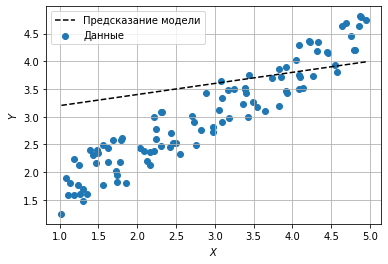

In [25]:
y_pred = predict(X_data, selected_W)
plot_model(X_data, y_pred, y_data)

На графике видно, что предсказания модели не соотносятся с данными, что говорит о том, что веса подобраны плохо. Это исправит процесс обучения модели!

# Метрики

Перед тем, как обучать модель, важной составляющей является оценка работы модели не только визуально (что полезно, но чаще всего субъективно), но и по численным характеристикам.

> При любых экспериментах рекомендуется отдавать предпочтение сравнению по численным показателям, так как визуально восприятие человека часто бывает искажено.

В данной практике начнем знакомтсво с двумя показателями: Корень среднеквадратичного отклонения (Root Mean Squared Error) и Среднее абсолютное отклонение (Mean Absolute Error). Обе характеристики имеют диапазон значений [0; $\infty$) и оцениваются по принципу "меньше значение метрики - лучше модель работает".

Квадратичное отклонение возводит значения ошибок в квадрат, поэтому сильнее реагирует на большие ошибки, так что его лучше применять в случае, когда большие ошибки нежелательны. Малые отклонения, возведенные в квадрат, наоборот становятся еще меньше. 

Абсолютные отклонения в свою очередь не меняют величину отклонений и представляют буквально среднее значение ошибок.


$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (h_W(x^{(i)})-y^{(i)})^2 } $$

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |h_W(x^{(i)})-y^{(i)}| $$

Пора перейти к реализации, давайте напишем функции для оценки предсказаний:

In [26]:
def rmse_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''   
    rmse_value = np.sqrt(sum(np.subtract(y_pred, y_true)**2) / len(y_true))
    # TODO - напишите функцию вычисления RMSE

    return rmse_value

def mae_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    mae_value = sum(np.abs(np.subtract(y_pred, y_true))) / len(y_true)
    # TODO - напишите функцию вычисления MAE
    return mae_value

In [27]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

assert np.isclose(rmse_value, 0.974679)
assert np.isclose(mae_value, 0.65)

Для проверки оценим работу модели на всем наборе данных:

In [28]:
# Проверим ошибку на всем наборе данных
y_true = y_data
X = X_data
y_pred = predict(X, selected_W)

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

rmse_value, mae_value

(0.8822495430466522, 0.7395733955141037)

> Существует также представление метрики $MSE$, которая имеет отношение с $RMSE$:
$$
RMSE = \sqrt{MSE}
$$
По сути чистое $MSE$ не соотносится по порядкам значений с $MAE$, поэтому в качестве метрики редко используется.

Осталось запомнить эти значения, чтобы затем сравнить с метриками на обученной модели.

# Функция потерь

Процесс обучения модели заключается в том, что мы каким-то образом меняем параметры модели (в случае линейной регрессии - веса признаков $w_i$ и смещение $w_0$) так, чтобы в результате обучения наша модель предсказывала данные как можно точнее. Для реализации такого процесса применяют методы оптимизации.

> Напомним, задача оптимизации - поиск экстремума (оптимума) по определенному критерию (функции потерь).

Мы помним, что при разных параметрах модели предсказания то лучше предсказывает, то хуже. То есть, функция потерь $J$ должна отражать, насколько хорошо модель предсказывает. Ну и так как мы меняем веса модели - это значит, что оптимизируем мы в пространстве параметров $W$. Значит обозначение функции потерь в нашем случае будет $J(W)$.

Для обучения модели линейной регрессии применяется следующая функция потерь, которую стараются минимизировать:

$$J(W) = \frac{1}{2*n} \|h_W(X)-y\|^2_2 $$

или

$$J(W) = \frac{1}{2*n} \sum_{i=1}^{n} (h_W(x^{(i)})-y^{(i)})^2 $$

где $y$ - значение зависимой переменной в данных, $\|.\|_2$ - $L2$ norm.

Данная функция потерь очень похожа на метрику $MSE$ за одним отличием - в знаменателе имеется число 2, что приводит к виду $J(W) = MSE/2$.

Главные свойства, которые должна иметь функция потерь:
- Отражать зависимость поведения модели: "меньше - лучше";
- Быть дифференцируемой.

Так как мы помним, что $MSE$ так и отражает принцип "меньше значение метрики - лучше модель работает", то доказывать дифференцируемость функции в данным момент не будем. Данная функция полностью удовлетворяет требованиям и можно заняться ее реализацией.

Но зачем же тут двойка? На самом деле, она упростит нам жизнь и сократится с другой двойкой при выводе формулы производной. Давайте проверим, не испортит ли она картину здесь:

Допустим, что мы имеет две модели - $M_1$ и $M_2$. Назначение функции потерь (как и метрики $MSE$) - оценить, насколько хорошо/плохо работает модель относительно другой модели. Положим, что сейчас показатели $MSE$ следующие:
- $MSE_{M_1} = 10$;
- $MSE_{M_2} = 6$;

Мы видим, что $M_2$ имеет меньшее значение, а значит работает лучше, чем $M_1$. А теперь, что будет, если мы оба значения поделим на 2? Посмотрим:
- $MSE_{M_1} = 5$;
- $MSE_{M_2} = 3$;

Фактически, изменились оба значения, но результат оценки все тот же - $M_2$ работает лучше, чем $M_1$! Это приводит нас к выводу, что метрика $MSE$ (как и остальные - $MAE$, $RMSE$) не искажается (не меняет результатов оценки) при масштабировании коэффициентом (в нашем случае $\frac{1}{2}$)!

Давайте теперь напишем реализации наших функций потерь!

In [29]:
def loss_function(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    # TODO - напишите реализацию функции потерь
    loss = sum(np.subtract(y_pred, y_true)**2) / (len(y_true) * 2)
    return loss

In [30]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
loss_value = loss_function(y_true, y_pred)

assert np.isclose(loss_value, rmse_value**2/2)

Соответственно, проверим наши данные: 

In [31]:
# Вычислим показатель loss на наших данных
y_true = y_data
X = X_data
y_pred = predict(X, selected_W)

loss_value = loss_function(y_true, y_pred)
loss_value

0.3891821281030133

Для понимания отобразим пространство весов (так как всего два параметра - мы можем это сделать!) и визуализируем поверхность функции потерь. Также отобразим точками положение в пространстве, которое соответсвует весам, по которым данные были построены (веса истинно зависимости данных), а также веса, которые были заданы случайно.

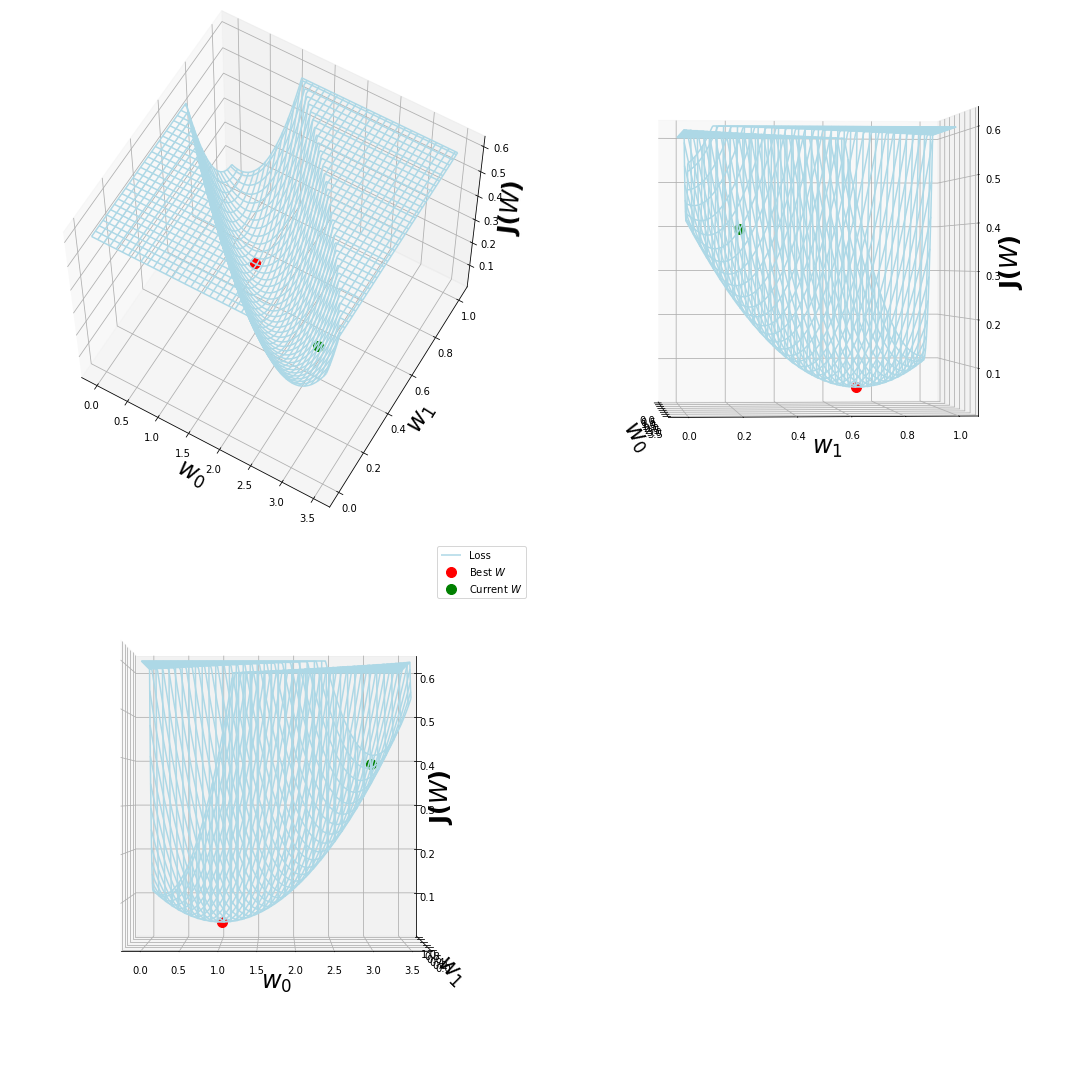

In [32]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

side_sz = 300

w0_vals = np.linspace(0, 3.5, side_sz)
w1_vals = np.linspace(0, 1, side_sz)

X = X_data
y_true = y_data

Z_MAX = 0.6

losses = np.ndarray((side_sz, side_sz))
for j in range(len(w1_vals)):
    w1 = w1_vals[j]
    for i in range(len(w0_vals)):
        w0 = w0_vals[i]
        
        render_W = np.array([w0, w1])
        y_pred = predict(X, render_W)

        loss = loss_function(y_true, y_pred)
        loss = np.clip(loss, 0, Z_MAX)
        losses[j, i] = loss

y_pred = predict(X, np.array(real_W))
real_point_loss = loss_function(y_true, y_pred)

y_pred = predict(X, selected_W)
current_point_loss = loss_function(y_true, y_pred)

fig = plt.figure(figsize=[15,15])
views = [
    # Subplot code, (around X, around Z)
    (221, (60, -60)),
    (222, (0, -5)),
    (223, (0, -90)),
]

ww0, ww1 = np.meshgrid(w0_vals, w1_vals)

for view in views:
    ax = fig.add_subplot(view[0], projection='3d')
    ax.plot_wireframe(
        ww0, 
        ww1, 
        losses, 
        color='lightblue', 
        rstride=8, 
        cstride=8, 
        label='Loss',
        cmap=cm.coolwarm,
    )

    ax.scatter(
        xs = [real_W[0]],
        ys = [real_W[1]],
        zs = [real_point_loss],
        color='r',
        label='Best $W$',
        s=100
    )

    ax.scatter(
        xs = [selected_W[0]],
        ys = [selected_W[1]],
        zs = [current_point_loss],
        color='g',
        label='Current $W$',
        s=100
    )

    ax.view_init(*view[1])
    
    font = {
        'color': 'black',
        'weight': 'bold',
        'size': 24,
    }
    ax.set_xlabel('$w_0$', fontdict=font)
    ax.set_ylabel('$w_1$', fontdict=font)
    ax.set_zlabel('J($W$)', fontdict=font)
    
    # ax.tick_params(axis='x', colors='black')
    # ax.tick_params(axis='y', colors='black')
    # ax.tick_params(axis='z', colors='black')

plt.legend()

plt.tight_layout()
plt.show()

График представляет синюю плоскость, которая является плоскостью функции потерь. То есть, если мы будем двигаться по осям и менять веса, то будем попадать на разные точки на этой плоскости. У каждого места на этой плоскости своя высота - значение функции потерь, а нам нужно спуститься в самую низкую точку!

> В визуализации специально ограничено максимальное значение функции потерь (из-за этого такие плоские области сверху) для более наглядной демонстрации минимума.

Как видно на графиках (представление с трех сторон для понимания), нынешние веса располагаются в синей точке, а красная точка - точка наилучших весов. Можно заметить, что точка наилучших весов является минимумом данной поверхности.

Таким образом, задача обучения - перейти из синей точки в красную точку.

Давайте теперь для упрощения глянем на двумерный график, если 3D был сложен для понимания:

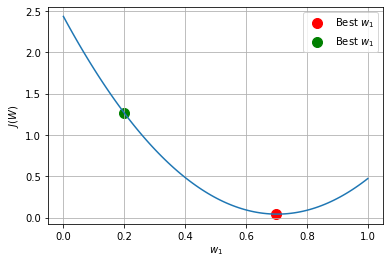

In [33]:
w1 = np.linspace(0, 1, 100)
w0 = real_W[0]

X = X_data
y_true = y_data

losses = []

for w1_val in w1:
    render_W = np.array([w0, w1_val])
    y_pred = predict(X, render_W)

    loss = loss_function(y_true, y_pred)
    # loss = np.clip(loss, 0, Z_MAX)
    losses.append(loss)

losses = np.array(losses)

plt.plot(w1, losses)

# Render best point
y_pred = predict(X, np.array([w0, real_W[1]]))
best_loss = loss_function(y_true, y_pred)
plt.scatter([real_W[1]], [best_loss], color='r', s=100, label='Best $w_1$')

# Render selected point
y_pred = predict(X, np.array([w0, selected_W[1]]))
selected_loss = loss_function(y_true, y_pred)
plt.scatter([selected_W[1]], [selected_loss], color='g', s=100, label='Best $w_1$')

plt.grid(True)
plt.legend()

plt.xlabel('$w_1$')
plt.ylabel('$J(W)$')

plt.show()

Здесь мы представили простой случай, когда мы меняем только вес признака, а константтное смещение не меняется, но и здесь видно, что задачей обучения будет спуск из зеленой точки (нынешний вес) до красной точки (лучший вес - минимум функции потерь).

# Градиентный спуск

Обучение моделей может быть сделано с использованием различных алгоритмов оптимизации, но одним из наиболее простых и в то же время эффективных показал себя алгоритм **градиентного спуска**. Основная идея алгоритма заключена в определении градиента (вектора производных).

Для примера возьмем функцию $y=0.5x^2$ и точку $x=1$:

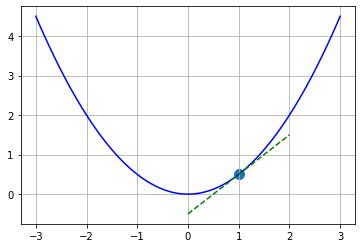

In [34]:
x = np.linspace(-3, 3, 100)
y = 0.5*x**2

x_grad = np.linspace(0, 2, 100)
y_grad = x_grad-0.5

plt.plot(x, y, 'b')
plt.plot(x_grad, y_grad, 'g--')
plt.scatter([1], [0.5], s=100)
plt.grid(True)
plt.show()

На графике синей линией обозначен график функции, а зеленым пунктиром - касательная в точке. Как помним, касательная - это как раз график производной функции.

По сути производная функции в точке показывает, **как** изменится значение функции при изменении аргумента, по которому берется производная, от этой точки. Производная в точке $x=1$ есть $\frac{\partial{(0.5x^2)}}{\partial{x}} = 1x = 1$. То есть, судя по производной (прямой линии), увеличим аргумент $x$ на единицу ($x=2$) и значение функции должно измениться до $y=1.5$. Судя по функции, изменение происходит по-другому ($x=2, y=2$). По такому примеру видно, что имея значение производной в точке, можно оценить, **в какую сторону** изменится значение функции при изменении аргумента.

Попробуем подойти с другой стороны: имеем описание функции $y=0.5x^2$ и точку, в которой мы располагаемся $x=1$. Попробуем найти ответ на вопрос, как нужно изменить значение $x$, чтобы **уменьшить значение функции** $y=f(x)$. Попробуем проверить два простых варианта:
- к значению $x$ прибавим значение производной в точке;
- от значения $x$ отнимем значение производной в точке.

Первый вариант $x \leftarrow x + \frac{\partial}{\partial x} f(x)$ нам дает следующий расчет, производная в точке равна $\frac{\partial}{\partial x}f(x) = 1$, прибавление значения дает нам $x=2$, при котором $f(x)=2$. То есть, прибавление производной дало нам увеличение значения функции.

Во втором варианте $x \leftarrow x - \frac{\partial}{\partial x} f(x)$ мы имеет новое значение аргумента $x=0$, при котором $f(x) = 0$. То есть, вычитание значения производной позволило уменьшить значение функции.

> Можете проверить аналогично при $x=-2$, прибавление производной ведет к увеличению функции (движемся влево), а вычитание ведет к уменьшению.

Таким образом, мы выяснили, что производная в точке показывает направление изменения функции при перемещении из этой точки, поэтому мы этим пользуемся для градиентных методов:
- градиентный спуск (gradient descent) - хотим двигаться к минимуму функции (минимизация), поэтому для уменьшения значения функции от аргумента отнимаем значение производной;
- градиентный подъем (gradient ascent) - хотим двигаться к максимуму функции (максимизация), поэтому для увеличения значения функции к аргументу прибавляем значение производной.

Введем небольшую поправку, возьмем функцию $y=5x^2$, производная равна $\frac{\partial y}{\partial x} = 10x$. Если мы находимся в точке $x=1, y=5$ и вычтем производную из аргумента, то получим $x=-9$, что привело к увеличению функции $y=405$. Странно, правило не работает?

> При этом можете убедиться, что прибавление производной также ведет к увеличению значения функции.

Да, в этом случае мы имеем слишком **большое значение градиента** и это приводит к эффекту **расходящегося градиента**. Это такой эффект, когда мы пытаемся двигаться к уменьшению функции, а из-за большого значения градиента наше перемещения наоборот увеличивает значение функции.

Для этого в правила градиентного спуска/подъема вводится специальный коэффициент $\alpha$ и правило для спуска выглядит так:
$$
x \leftarrow x - \alpha \frac{\partial}{\partial x} f(x)
$$

Этот коэффициент позволяет уменьшить значени градиента, чтобы он не так сильно влиял на перемещение. Так для последнего случая, имея $\alpha=0.1$, вычитание даст переход из точки $x=1, y=5$ при $\alpha \frac{\partial y}{\partial x} = 1$ в точку $x=0, y=0$. Отлично, теперь правило снова работает!

Отлично! Понимая, как нужно менять значение аргумента функции, чтобы эту самую функцию минимизировать, мы просто делаем это последовательно шаг за шагом, чтобы так и добраться до минимума. Это очень *жадное* предположение (с точки зрения алгоритмов), но зато алгоритм очень простой и требует лишь нахождения производной функции.

Теперь обратимся к нашей задаче. У нас есть:
- функция потерь $J(W)$, которая оценивает, как работает наша модель;
- параметры модели $W$, которые мы меняем, чтобы сделать работу модели лучше/хуже.

Таким образом, используя принцип градиентного спуска для минимизации функции потерь, мы меняем аргумент в соответствии с правилом градиентного спуска, вычитая значение производной умноженной на $\alpha$ (который в обучении называется **коэффициентом обучения**):
$$
W \leftarrow W - \alpha \frac{\partial}{\partial W} J(W)
$$

Но мы помним, что $W$ - это не скаляр, а вектор, так что правило обновления для каждого веса будет выглядеть так:
$$
w_j \leftarrow w_j - \alpha \frac{\partial}{\partial w_j} J(W)
$$

где $w_j$ - $j-й$ вес.

По данной формуле видно, что мы просто выводим формулу производной функции, а потом вычисляем значение функции потерь при нынешних весах, обновляем веса и так шаг за шагом. Перейдем к выводу производной!

Еще раз вспомним, как выглядит функция потерь и функция предсказания для линейной регрессии для одной переменной:

$$
J(W) = \frac{1}{2*n} \sum_{i=1}^{n} (h_W(x^{(i)})-y^{(i)})^2 \\
h_W(X) = XW = \sum_{i=1}^{n} x^{(i)}*w_1+w_0
$$ 

Для дальнейшего вывода введем упрощающее обозначение:
$$
E(x^{(i)}) = h_W(x^{(i)})-y^{(i)}
$$

Значит производная функции потерь будет выглядеть следующим образом:

$$
\frac{\partial}{\partial w_j} J(W) = 
\frac{\partial}{\partial w_j}  \frac{1}{2*n} \sum_{i=1}^{n} E(x^{(i)})^2 =
\frac{1}{2*n} \sum_{i=1}^{n} \frac{\partial}{\partial w_j} E(x^{(i)})^2
$$

Данный вывод сделали с учетом правила работы:
- С производными от умножения на скаляры $\frac{\partial}{\partial x}kx = k\frac{\partial}{\partial x}x$;
- Производными сумм $\frac{\partial}{\partial x}(f(x)+g(x)) = \frac{\partial}{\partial x}f(x) + \frac{\partial}{\partial x}g(x)$.

Далее требуется найти производную квадрата разницы между предсказанным и истинным значениями:

$$
\frac{\partial}{\partial w_j} E(x^{(i)})^2 = \\
2*E(x^{(i)})\frac{\partial}{\partial w_j} E(x^{(i)})
$$

Для данного вывода мы воспользовались:
- Цепным правилом $\frac{\partial}{\partial x}f(g(x)) = \frac{\partial}{\partial g(x)}f(g(x)) * \frac{\partial}{\partial x}g(x)$.
- Правилом степеней $\frac{\partial}{\partial x}x^n = n*x^{n-1}\frac{\partial}{\partial x}x$;


Промежуточный вид с учетом $E(x^{(i)}) = h_W(x^{(i)})-y^{(i)}$ (разворачиваем обратно и под производной разворачиваем $h_W(x^{(i)})$ к виду линейной регрессии):

$$
\frac{\partial}{\partial w_j} J(W) = 
\frac{1}{2*n} \sum_{i=1}^{n} 2*(h_W(x^{(i)})-y^{(i)})\frac{\partial}{\partial w_j}((x^{(i)}*w_1+w_0)-y^{(i)})
$$


Далее находим производные оставшихся частей в зависимости от веса с учетом вида функции предсказания:
> Обратите внимание, уже конкретные $w_1$ и $w_0$ вместо $w_j$

$$
\frac{\partial}{\partial w_0}((w_0 + w_1*x^{(i)})-y^{(i)}) = 1
$$

$$
\frac{\partial}{\partial w_1}((w_0 + w_1*x^{(i)})-y^{(i)}) = x^{(i)}
$$

Соответвенно, можно представить вид производных по каждому весу: 

$$
\frac{\partial}{\partial w_0} J(W) = 
\frac{1}{n} \sum_{i=1}^{n} (h_W(x^{(i)})-y^{(i)}) \\
\frac{\partial}{\partial w_1} J(W) = 
\frac{1}{n} \sum_{i=1}^{n} (h_W(x^{(i)})-y^{(i)})*x^{(i)}
$$

Можно также это выразить, как матричное выражение (заменив знак суммы на умножение матриц):

> Помним, что $X$ - матрица $(n, 1)$

$$
\frac{\partial}{\partial w_0} J(W) = \frac{1}{n} 1^T*(h_W(X)-y) \\
\frac{\partial}{\partial w_1} J(W) = \frac{1}{n} X^T*(h_W(X)-y)
$$

> Здесь 1 - вектор-столбец, состоящий из единиц длиной $n$.

Ура, мы получили математический вид производных, которые позволят нам реализовать алгоритм градиентного спуска для обучения нашей модели!

На всякий случай, более простая визуализации алгоритма, только уже с одним параметром:

> В линейной регрессии с одним признаком - два параметра для оптимизации: $w_1$ и $w_0$, здесь в примере просто описание градиентного спуска с единственным параметром

![as](https://miro.medium.com/max/1005/1*f0CuPDSWFUr9XGESWQ4JUA.png)

Суть алгоритма заключается в том, что шарик, находясь в определенном положении (вектор весов $W$ - так как двигаемся мы в пространстве весов), может определить не только, насколько он высоко находится (функция потерь $J(W)$), но и понять, куда ему надо двигаться, чтобы эту высоту уменьшить ($\frac{\partial}{\partial w_j} J(W)$ - градиент, направление движения). Также коэффициент обучения $\alpha$ говорит о том, насколько большой шаг мы сделаем, огромный и быстрый или маленький и медленный. Цель алгоритма, спустить шарик так низко, насколько это возможно (найти оптимальное значение весов $W$, при котором $J(W)$ будет минимальна).

Для практики реализуем функции вычисления производных для каждого веса по отдельности:

In [35]:
def loss_function_deriv_w0(X, W, y_true):
    n = len(X)
    hw = np.concatenate((np.ones((len(X), 1), dtype=int), X), axis=1) @ W
    loss_deriv_w0 = (1 / n) * np.sum(hw - y_true)
  
    return loss_deriv_w0   


def loss_function_deriv_w1(X, W, y_true):
    # TODO - код расчета производной для веса признака 1
    n = len(X)
    X_new = np.concatenate((np.ones((len(X), 1), dtype=int), X),axis=1)
    hW = X_new @ W

    loss_deriv_w1 = (1 / n) * np.sum((hW - y_true) @ X)
    
    
    return loss_deriv_w1

In [36]:
# TEST
X = np.array([
    [1],
    [4],
])
W = np.array([1, 2])
y_true = np.array([1, 3])

dJ_w0 = loss_function_deriv_w0(X, W, y_true)
dJ_w1 = loss_function_deriv_w1(X, W, y_true)

assert dJ_w1 == 13
assert dJ_w0 == 4

In [37]:
# Посмотрим на данных
y_true = y_data
X = X_data

dJ_w0 = loss_function_deriv_w0(X, selected_W, y_true)
dJ_w1 = loss_function_deriv_w1(X, selected_W, y_true)

In [38]:
dJ_w1, dJ_w0

(0.8902676036763332, 0.5618067900885585)

После чего, выполним алгоритм поиска на нескольких итерациях, попутно собирая значения функции потерь, чтобы отобразить:

In [39]:
# Alpha - learning rate (lr)
lr = 0.01
n_iterations = 1000
# Создаем вектор весов с размерностью количества признаков + 1
new_W = np.zeros(X.shape[1]+1)
loss_history = []

for i_iter in range(n_iterations):
    dJ_w0 = loss_function_deriv_w0(X, new_W, y_true)
    dJ_w1 = loss_function_deriv_w1(X, new_W, y_true)
    # TODO - код обновления весов
    new_W = [new_W[0] - lr * dJ_w0,
             new_W[1] - lr * dJ_w1]
    y_pred = predict(X, new_W)
    loss = loss_function(y_true, y_pred)
    loss_history.append(loss)

In [40]:
# TEST

assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))

Теперь напишем функцию отображения истории обучения:

In [41]:
def show_loss(loss_history):
    plt.plot(loss_history)
    plt.grid()
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('$J(X)$')
    plt.show()

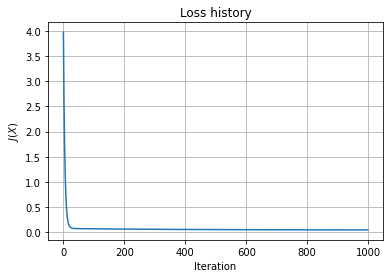

In [42]:
show_loss(loss_history)

In [43]:
new_W

[0.7655567074176559, 0.772510923423084]

Новые веса уже ближе располагаются к тем весам, по которым построены данные - отлично! Значит алгоритм работает! Осталось отобразить предсказания модели и проверить метрики, чтобы окончательно убедиться:

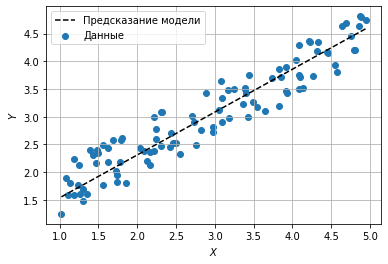

0.29837055288874936

In [44]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

rmse_value = rmse_score(y_true, y_pred)
rmse_value

Метрика $RMSE$ стала меньше, не так ли? Это отличный показатель того, что обученная модель работает лучше, чем с какими-то случайными весами!

## Больше визуализации результатов!

Для расширения багажа инструментов анализа познакомимся с еще двумя способами оценки результатов предсказания!

Первым способом является отображение распределения отклонений:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


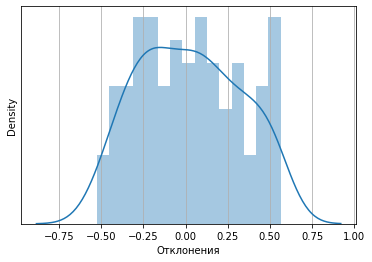

In [45]:
y_residuals = y_true-y_pred

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.xlabel('Отклонения')
plt.show()

Мы видим, что распределение является похожим на нормальное и среднее близко к нулю - это важное понимание того, что модель работает правильно! Для сравнения проверим картину со случайными весами:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


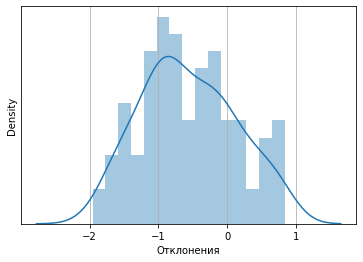

In [46]:
y_residuals = y_true-predict(X, selected_W)

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.xlabel('Отклонения')
plt.show()

В данном случае характер распределения данных все еще похож на нормальный (из-за того, что данных всего 100 записей), но среднее уже смещено относительно нуля. Это объясняет точечный график отклонений: 

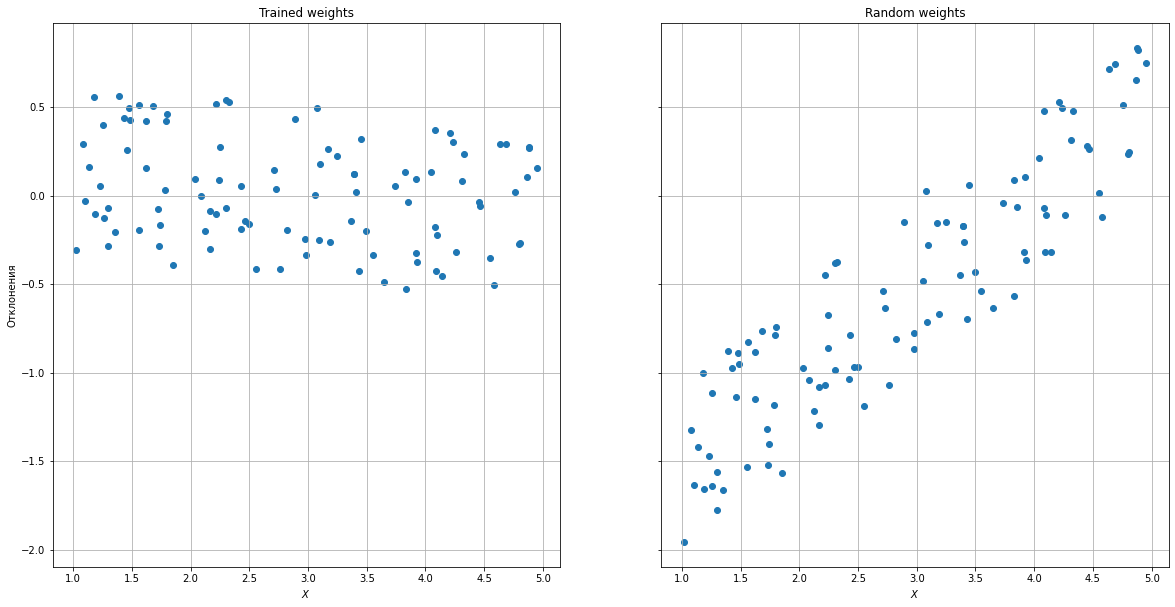

In [47]:
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_pred = predict(X, new_W)
ax[0].scatter(X, y_true-y_pred)
ax[0].grid(True)
ax[0].set_title('Trained weights')
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('Отклонения')

y_pred = predict(X, selected_W)
ax[1].scatter(X, y_true-y_pred)
ax[1].grid(True)
ax[1].set_title('Random weights')
ax[1].set_xlabel('$X$')

plt.show()

На левом графике обученная модель и отклонения предсказания колеблятся около нуля - это и проверяет картина распределения. В случае плохой модели (график справа) отклонения не сконцентрированы около нуля - модель плохо повторяет зависимость в данных.

Второй способ визуализации также является очень интуитивным, это график предсказанных значений от истинных:

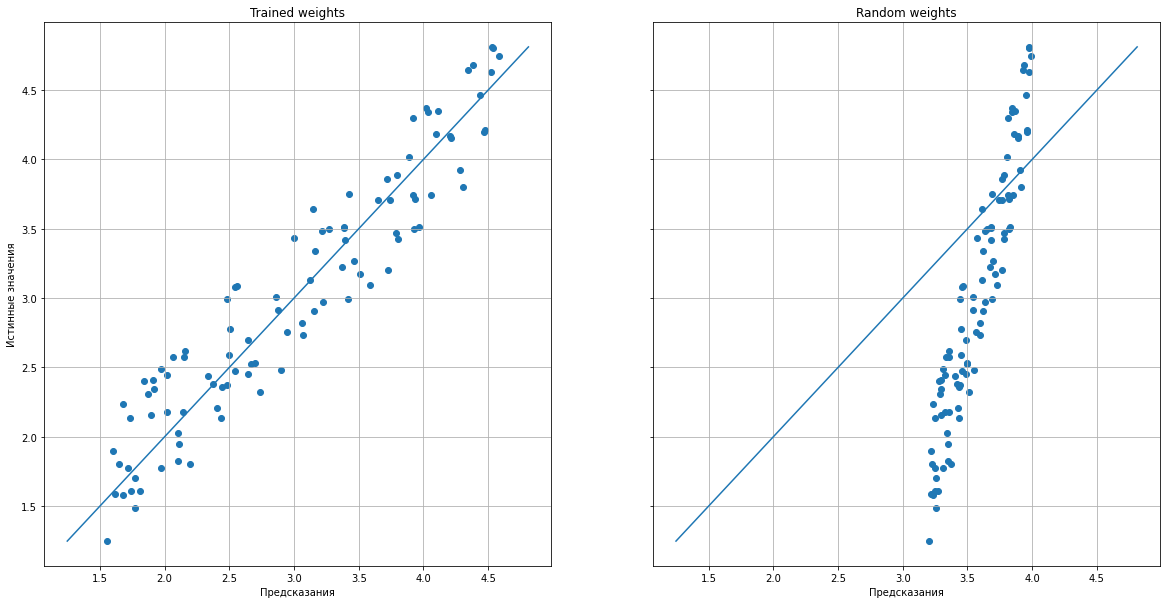

In [48]:
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_diag = np.sort(y_true)

y_pred = predict(X, new_W)
ax[0].plot(y_diag, y_diag)
ax[0].scatter(y_pred, y_true)
ax[0].grid(True)
ax[0].set_title('Trained weights')
ax[0].set_ylabel('Истинные значения')
ax[0].set_xlabel('Предсказания')

y_pred = predict(X, selected_W)
ax[1].plot(y_diag, y_diag)
ax[1].scatter(y_pred, y_true)
ax[1].grid(True)
ax[1].set_title('Random weights')
ax[1].set_xlabel('Предсказания')

plt.show()

Такой график показывает, как распределены предсказания относительно истинных значений. Можно заметить, что при хорошей работе модели (слева) точки повторяют диагональную прямую, а при плохой (справа) - имеют другое распределение.

# Векторный градиентный спуск

Реализованный градиентный спуск работает и этим нельзя не гордиться! Остается вопрос в том, что сейчас реализация ограничена моделью линейной регрессии с одним признаком. Пора бы перейти к общему случаю для любого количества признаков!

Матричный вид правила обновления выглядит несложно, нужно просто умножить вектор частных производных (градиент) на $\alpha$ и отнять от старых весов, чтобы получить новые:

$$
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}
\leftarrow 
\begin{bmatrix}
w_0 \\
w_1 \\
\end{bmatrix}
-
\alpha 
\begin{bmatrix}
\frac{\partial}{\partial w_0} J(W) \\
\frac{\partial}{\partial w_1} J(W) \\
\end{bmatrix}
$$

Вспомним, как выглядят правила обновления весов по отдельности, но в матричной форме для случая линейной регрессии одной переменной:

$$
\frac{\partial}{\partial w_0} J(W) = \frac{1}{n} 1^T*(h_W(X)-y) \\
\frac{\partial}{\partial w_1} J(W) = \frac{1}{n} X^T*(h_W(X)-y)
$$


Выражение $h_W(X)-y$ в результате дает вектор-столбец, который затем в случае $w_1$ мы поэлементно умножаем на вектор $X$ (матрицу, но у нас же $(n, 1)$). По факту это умножение - перемножение отклонения предсказанного значения для $i$-й записи в данных на $i$-e значение нашего единственного признака. Для случая многих признаков мы бы имели форму:

$$
\frac{\partial}{\partial w_j} J(W) = \frac{1}{n} X^T_j(h_W(X)-y)
$$

То есть, в зависимости от того, по какому весу берется производная, ту колонку (признак) в данных мы и умножаем на вектор отклонений.

Теперь вспоминаем, что для $w_0$ нам нужно умножить последнюю колонку матрицы $X$, для $w_1$ - предпоследнюю, и т.д. Значит, чтобы сделать умножение колонок матрицы $X$ на вектор-колонку $h_W(X)-y$ мы можем просто транспонировать матрицу $X$, чтобы умножение делалось не колонка на колонку, а строка на колонку.

> В матрице $X^T$ следующая разметка, строки - признаки, колонки - записи.


Таким образом мы получаем для нашего случая:

$$
\begin{bmatrix}
\frac{\partial}{\partial w_0} J(W) \\
\frac{\partial}{\partial w_1} J(W) \\
\end{bmatrix}
=
\frac{1}{n} X^T(h_W(X)-y)
$$

И для общего случая:

$$
\begin{bmatrix}
\frac{\partial}{\partial w_0} J(W) \\
\frac{\partial}{\partial w_1} J(W) \\
\vdots \\
\frac{\partial}{\partial w_{m-1}} J(W) \\
\frac{\partial}{\partial w_m} J(W) \\
\end{bmatrix}
=
\frac{1}{n} X^T(h_W(X)-y)
$$

Самое время провести реализацию выведенных законов!

In [49]:
def loss_function_deriv(X, W, y_true):

    ones_arr = np.ones((len(X), 1), dtype=int)
    X_with_ones = np.concatenate((ones_arr, X), axis=1)
    hW = X_with_ones @ W
    n = X.shape[0]

    loss_deriv = (1 / n) * np.sum((np.transpose(X_with_ones) * (hW - y_true)), axis=1)

    # TODO - код вектора производных (градиента)
    return loss_deriv

In [50]:
# TEST
X = np.array([
    [1, 3],
    [4, 2],
])
W = np.array([1, 1, 2])
y_true = np.array([1, 3])

dJ = loss_function_deriv(X, W, y_true)
dJ_true = np.array([6.5, 15.5, 16.5])

assert np.all(dJ == dJ_true)
assert np.all(dJ.shape == dJ_true.shape)

Также, для удобства напишем функцию обучения модели:

In [51]:
def fit_model(lr, n_iter, X, y):

    new_W = np.zeros(X.shape[1]+1)
    loss_history = []
    print(f'Data shape: {X.shape}')
    print(f'Start weights: {new_W}')

    for i_iter in range(n_iter):
        # TODO - добавьте код обновления весов и вычисления предсказаний
        dJ = loss_function_deriv(X, new_W, y)
        # print(new_W)
        new_W = new_W - lr * dJ
        y_pred = predict(X, new_W) 
        loss = loss_function(y, y_pred)
        loss_history.append(loss)
        # new_W[0] = loss_history[0][i_iter]

    print(f'Result weights: {new_W}')
    print(new_W)
    return new_W, loss_history

In [52]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=1000,
    X=X_data,
    y=y_data
)

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]
[0.76555671 0.77251092]


In [53]:
# TEST
print(new_W)
assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))

[0.76555671 0.77251092]


## Задание
Изучите, как влияет значение `lr` на скорость сходимости - проверьте значения: [1, 0.1, 0.01, 0.001, 1e-4], отобразите графики функции потерь и предсказания модели, сделайте выводы.

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.94188948 0.71941946]
[0.94188948 0.71941946]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]
[0.76555671 0.77251092]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.35950346 0.89474377]
[0.35950346 0.89474377]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.18946813 0.59753725]
[0.18946813 0.59753725]


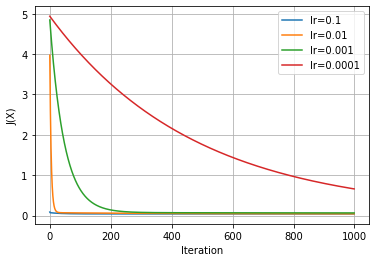

In [54]:
# TODO - обучите модели при разных коэффициентах обучения 
#           и отобразите графики истории
arr_lr = np.array([0.1, 0.01, 0.001, 0.0001])
for lr_element in arr_lr:
  new_W, loss_history = fit_model(lr=lr_element, n_iter=1000, X=X_data, y=y_data)
  plt.plot(loss_history)

plt.legend(['lr=0.1', 'lr=0.01', 'lr=0.001', 'lr=0.0001'])
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('J(X)')
plt.show()


# Полиномиальная регрессия

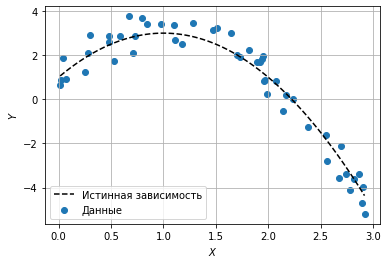

In [55]:
n_points = 50

real_W = [1, 4, -2]
X_data = 3*np.sort(np.random.rand(n_points, 1), axis=0)
noize = 2*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data + real_W[2]*X_data**2
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data.min(), X_data.max(), 100)
y_render = real_W[0] + real_W[1]*X_render + real_W[2]*X_render**2

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y_render, 'k--', label='Истинная зависимость')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()

Полиномиальная зависимость имеет вид

$$
y = w_0+w_1*x+w_2*x^2
$$

Такое представление можно выразить через линейную зависимость, если принять, что квадрат признака - это новый признак, то есть:
$$
\begin{align}
x_1 = x \\
x_2 = x^2 
\end{align}
$$

При этом набор данных и веса с полиномиальными признаками будут иметь вид в матричном представлении:
$$
X = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 \\
1 & x^{(2)}_1 & x^{(2)}_2 \\
\vdots \\
1 & x^{(n)}_1 & x^{(n)}_2 \\
\end{bmatrix}
$$

$$
W = 
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\end{bmatrix}
$$

При этом, обратите внимание, что функция предсказания $h_W(X)$ остается прежней. Это означает, что мы свели вопрос полиномиальной зависимости к решению через линейную регрессию.

Так как в модели уже три веса, то отобразить плоскость функции потерь затруднительно, но мы можем проверить работоспособность наших функций, которые были написаны ранее.

Перед этим нам нужно сформировать преобразование, которое будет приводить вектор данных к представлению для линейной регрессии. Называется такой шаг - генерация полиномиальных признаков.

In [56]:
def generate_polynomial_features(X, degree):

    X_poly = X
    # TODO - код генерации полиномиальных признаков
    #           из вектора X
    for i in range(degree - 1):
      X_poly = np.concatenate((X_poly, X**(i+2)), axis = 1)
    return X_poly

In [57]:
# TEST
X = np.array([
    [1],
    [2],
    [3],
])

X_poly = generate_polynomial_features(X, degree=2)
assert np.all(X_poly == np.array([[1, 1], [2, 4], [3, 9]]))

In [58]:
X_poly = generate_polynomial_features(X_data, degree=2)

In [59]:
# Задаем примерные начальные веса
selected_W = np.array([1.1, 1.2, 1.3])
X = generate_polynomial_features(X_data, degree=2)
y_true = y_data

# Проверяем предикт
y_pred = predict(X, selected_W)

y_pred.shape, y_pred.shape[0] == X_data.shape[0]

((50,), True)

In [60]:
# Проверяем показатель метрики
rmse_value = rmse_score(y_true, y_pred)

rmse_value

9.54122425719995

Для отображения полиномиальной зависимости нужно немного обновить функцию.

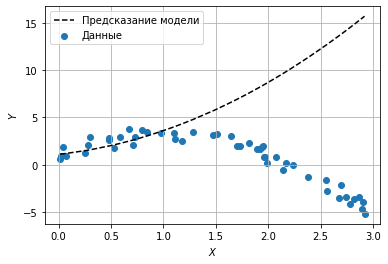

In [61]:
plot_model(X_data, y_pred, y_data)

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.79060588  3.02760564 -1.75710417]
[ 1.79060588  3.02760564 -1.75710417]


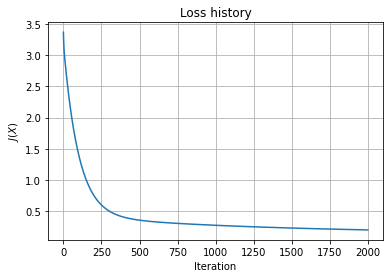

In [62]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

show_loss(loss_history)

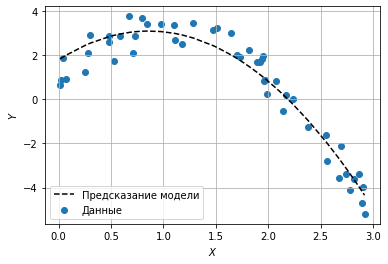

0.629951155135481

In [63]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_true)
rmse_score(y_true, y_pred)

# Underfit (high bias)

Эффект Underfit - эффект, когда сложность модели меньше, чем требуемая для описания данных. Самый простой пример, выбор модели первого порядка для описания зависимости второго порядка:

Data shape: (50, 1)
Start weights: [0. 0.]
Result weights: [ 3.9101159  -2.04843436]
[ 3.9101159  -2.04843436]


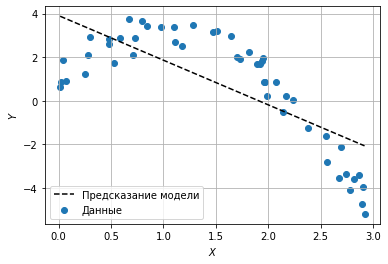

In [64]:
DEGREE=1
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

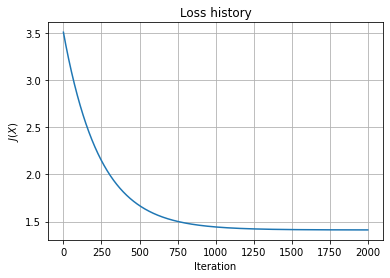

In [65]:
show_loss(loss_history)

# R2 метрика (коэффициент детерминации)

Как видно, модель "плохо" описывает данные, при этом градиентный спуск нашел веса для условия минимума функции потерь. Функции $RMSE$ и $MAE$ хорошо использовать для относительных сравнений работы моделей, так как они не имеют верхнего предела. Для абсолютной оценки удобно использовать метрику $R^2$ (r-squared) - коэффициент детерминации.

Вычисляется оценка с помощью двух составляющих:
- Сумма квадратов отклонений данных (total sum of squares)
$$
SS_{tot}=\sum_{i}(y^{(i)}-\bar{y})^2
$$

- Сумма отклонений предсказаний (sum of squares of residuals)
$$
SS_{res}=\sum_{i}(y^{(i)}-h_W^{(i)}(x^{(i)}))^2
$$

где $\bar{y}=\frac{1}{n}\sum_{i}y^{(i)}$

Сама оценка рассчитывается следующим образом:
$$
R^2=1-\frac{SS_{res}}{SS_{tot}}
$$

Особенностью показателя является то, что он имеет верхний предел 1.0, который достигается в случае, если отклонения предсказаний всегда равны нулю. Нижний предел не ограничивается. Суть коэффициента детерминации в том, что в качестве худшего случая предсказания принимается линия, равная среднему значению $y$. При таком варианте коэффициент равен нулю. Если модель предсказывает лучше, чем худший случай, то значение будет варьироваться от 0 до 1. Если модель описывает данные хуже, чем "всегда среднее", то такой кейс считается неприемлимым.

In [66]:
def r2_score(y_true, y_pred):
    # TODO - код расчета R-squared
    y_mean = np.sum(y_true) / len(y_true)
    SStot = np.sum((y_true - y_mean)**2)
    SSres = np.sum((y_true - y_pred)**2)
    r2_value = 1 - (SSres / SStot)
    print(r2_value)
    return r2_value

In [67]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

r2_value = r2_score(y_true, y_pred)

assert np.isclose(r2_value, -1.773722)

-1.7737226277372269


In [68]:
y_true = y_data
y_pred = predict(X, new_W)
r2_value = r2_score(y_true, y_pred)

r2_value, r2_value > 0

0.5634150525920686


(0.5634150525920686, True)

В данном случае мы видим, что модель предсказывает лучше, чем просто среднее значение вектора истинного значения, что уже хорошо. Но при этом показатель недостаточно высок, чтобы сказать, что модель "хорошо" описывает данные - случай underfit. Это видно как на графике, так и выведенно численно ($R^2$). Для примера сравните с показателем при обучении модели второго порядка.

## Задание
Произведите обучение модели второго порядка и оцените коэффициент детерминации.

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 2.18692254  2.30469737 -1.53176139]
[ 2.18692254  2.30469737 -1.53176139]
0.5634150525920686
r2_value=0.5634150525920686


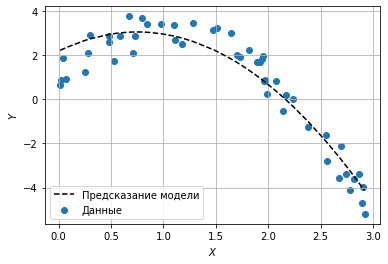

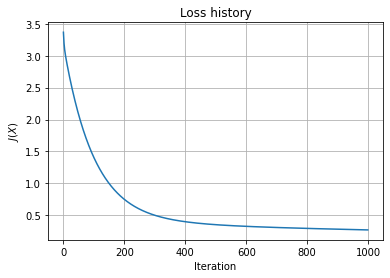

In [69]:
# TODO - обучите модель при признаках второго порядка и оцените R2
DEGREE=2
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=1000,
    X=X,
    y=y_data
)
r2_value = r2_score(y_true, y_pred)
print(f'r2_value={r2_value}')
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)
show_loss(loss_history)


# Overfit (high variance)

Случай overfit является обратным к underfit, когда модель является слишком сложной (комплексной), нежели требуется для описания данных. Для разбора такого случая воспользуемся моделью десятого порядка для данных, которые имеют зависимость второго порядка. 

> Пример сгенерирован с использованием `numpy.linalg.lstsq` - метод наименьших квадратов, который применим к линейной регрессии. Это аналитический метод, который находит наилучшее решение для линейных методов. Связано это с тем, что при большом количестве признаков пространство ошибок становится крайне неравномерным, а из-за итеративности метода градиентного спуска он останавливается в локальном минимуме.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


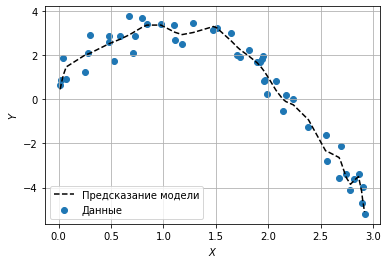

0.9656170876432901


(0.47155692061158894, 0.9656170876432901)

In [70]:
DEGREE=25
X = generate_polynomial_features(X_data, degree=DEGREE)
y = y_data

def fit_model_least_square(X, y):
    coef_, _residues, rank_, singular_ = np.linalg.lstsq(X, y)
    coef_ = np.insert(coef_, 0, 0)
    new_W = np.array(coef_)

    return new_W

new_W = fit_model_least_square(X, y)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)
rmse_score(y_true, y_pred), r2_score(y_true, y_pred)

Один из простых методов для определения overfit является подход **hold-out**, при котором происходит разделение всей выборки на обучающую и тестовую выборки в соотношении 70/30 или 80/20 (чем больше данных в целом, тем меньше может быть процент тестовой выборки). Таким образом модель учится на обучающей выборке, а тестовая используется лишь для оценки показателей метрик.

In [71]:
DATA_COUNT=X_data.shape[0]
# np.random.permutation() - функция перемешивания данных 
#   в переданном массиве
data_indexes=np.random.permutation(range(DATA_COUNT))

# 70% данных уходит на обучение
TRAIN_COUNT=int(DATA_COUNT*0.7)
train_indexes=data_indexes[:TRAIN_COUNT]
test_indexes=data_indexes[TRAIN_COUNT:]

X_train = X_data[train_indexes]
y_train = y_data[train_indexes]
X_test = X_data[test_indexes]
y_test = y_data[test_indexes]

X_train = generate_polynomial_features(X_train, degree=DEGREE)
X_test = generate_polynomial_features(X_test, degree=DEGREE)

In [72]:
new_W = fit_model_least_square(X_train, y_train)

y_pred = predict(X_test, new_W)
test_mse = rmse_score(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

y_pred = predict(X_train, new_W)
train_mse = rmse_score(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)

print(f'Train MSE: {train_mse} / R2: {train_r2}')
print(f'Test MSE: {test_mse} / R2: {test_r2}')

-0.8150447984222537
0.9673349482797522
Train MSE: 0.3905165625997551 / R2: 0.9673349482797522
Test MSE: 4.092185521835706 / R2: -0.8150447984222537


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Как видим, явным признаком ситуации overfit является сильная разница в показаниях метрик обучащей и тестовой выборке.

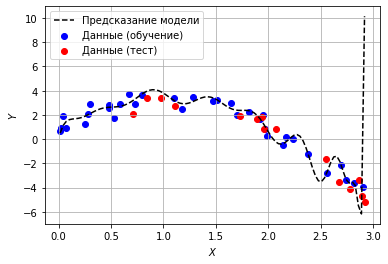

In [73]:
X_min = X_data[:,0].min()
X_max = X_data[:,0].max()

X_render = np.linspace(X_min, X_max, 100).reshape(-1, 1)
# Добавим генерацию полиномиальных признаков
X_render = generate_polynomial_features(X_render, DEGREE)
y_render = predict(X_render, new_W)

plt.scatter(X_train[:,0], y_train, color='blue', label='Данные (обучение)')
plt.scatter(X_test[:,0], y_test, color='red', label='Данные (тест)')
plt.plot(X_render[:,0], y_render, 'k--', label='Предсказание модели')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()
plt.show()

По сути, природой такого эффекта является то, что вместо отражения общих зависимостей, модель старается как можно точнее отработать на выборке, на которой обучается. Таким образом, модель отдаляется от работы с зависимостью и сильнее реагирует на шумы в данных.

> Эффект overfit еще сравнивают с "запоминанием" данных моделью. Это связано с тем, что при большой комплексности модели она может запомнить конкретные точки (на примере полиномов - высокий порядок позволяет сильнее изгибаться), что ведет к невозможности адекватно предсказывать на новых данных.

Как видно на картинке, увеличение комплексности модели ведет к увеличению Variance и уменьшению Bias. Так, слишком комплексная модель начинает заниматься запоминанием, а не построением общей зависимости. При недостаточно комплексности высок Bias, что ведет к невозможности описать зависимости.Наилучший вариант, когда модель близка по комплексности к данным, на которых обучается.

![title](https://miro.medium.com/max/492/1*kADA5Q4al9DRLoXck6_6Xw.png)

Таким образом, эффекты Underfit/Overfit достаточно распространены в работе с моделями. При этом если Underfit можно увидеть уже на моменте оценки работы модели, то для избежания эффекта Overfit можно перечислить некоторые методы работы помимо Holt-Out (Train/Test):
- Увеличение количества данных;
- Методы **регуляризации** (Ридж, Лассо);
- Кросс-валидация;
- Уменьшение количества признаков;
- Ансамблирование;
- и др. 

# Стандартизация/нормализация значений признаков

Теперь давайте возьмем наши данные, которые имеют полиномиальную зависимость и попробуем описать ее полиномом 7-го порядка:

In [74]:
DEGREE=7
X_poly = generate_polynomial_features(X_data, degree=DEGREE)

In [75]:
X = X_poly
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_true
)

Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


Что-то странное произошло - все веса стали `nan` (Not A Number). Для того, чтобы разобраться с проблемой, в первую очередь стоить посмотреть на значения вычисленных производных (величину градиента).

In [76]:
start_W = np.zeros(DEGREE+1)
dJ = loss_function_deriv(X, start_W, y_true)
print(dJ)

[-7.51507038e-01  5.89341507e-01  3.94164214e+00  1.37566793e+01
  4.23857078e+01  1.24938015e+02  3.61130019e+02  1.03388272e+03]


Как видно, значения производных первых признаков на порядок отличается от значений производных последних признаков. Большие значения производных (большая величина градиента) ведет к огромному шагу в пространстве признаков, что приводит к проблеме **расходящегося градиента**.

![КАРТИНКА С РАСХОДЯЩИМСЯ ГРАДИЕНТОМ](https://miro.medium.com/max/700/1*hGhRddOUV8h0pdQek8T35A.png)

Для решения проблемы расходящегося градиента можно уменьшить коэффициент обучения, тем самым уменьшив шаг перемещения в пространстве весов - это повышает стабильность алгоритма.

Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [ 0.00302232  0.00305042  0.00390593  0.00543676  0.00756809  0.00953691
  0.00814314 -0.0071459 ]
[ 0.00302232  0.00305042  0.00390593  0.00543676  0.00756809  0.00953691
  0.00814314 -0.0071459 ]


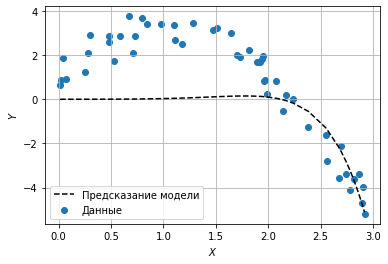

In [77]:
new_W, loss_history = fit_model(
    lr=1e-6,
    n_iter=2000,
    X=X,
    y=y_true
)
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

По графику обученная модель плохо предсказывает данные.

Вспомним значения градиентов, у признаков ближе к нулевому индексу значение более тысячи по модулю, хотя производная последнего элемента меньше единицы по модулю. Это сказывается на процессе обучения: при большом коэффициенте обучения градиент расходится, при малом - веса обновляются очень долго и при этом только те веса, у которых градиент достаточно большой, чтобы умножение на очень малый коэффициент обучения дало хоть какое-то обновление.

> Именно эта проблема еще называется проблемой зависания в "плато"

Таким образом, различия в пределах распределения признаков в данных может очень сильно сказаться на процессе обучения, так как признаки с большими значениями сильнее реагируют на изменения по сравнению с признаками, которые имеют малые значения, при том, что коээфициент обучения один.

Для решения данной проблемы выполняется процесс стандартизации. Он заключается в том, чтобы привести все признаки к единому диапазону за счет добавления шага предобработки данных.

Наиболее распространенным процессом стандартизации является приведение распределения к распределению с нулевым средним (центрования) и единичным стандартным отклонением (машстабирование).

> Связано это с тем, что огромные массивы случайных данных вероятнее всего имеют нормальное распределение. На деле признаки не всегда имеют данный характер распределения, но тем не менее оно остается желанным, так как с ним проще работать. Как известно, нормальное распределение характеризуется средним и стандартным отклонением, именно поэтому процесс стандартизации использует эти два шага.

Для вычисления средних значений и стандартных отклонений для каждого признака воспользуеся методами `mean()` и `std()` из пакета `numpy` по оси записей (аргумент `axis`).

Принцип нормализации основывается на формуле:

$$
X_{standardized}=\frac{X-X_{mean}}{X_{std}}
$$

In [78]:
def standardize_features_scale(X):
    X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # TODO - код для стандартизации
    print(X_scaled)
    return X_scaled

In [79]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = standardize_features_scale(X)

# Cтандартизированные данные должны иметь нулевое среднее и единичное стандартное отклонение
assert np.all(np.isclose(X_scaled.mean(axis=0), 0))
assert np.all(np.isclose(X_scaled.std(axis=0), 1))

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[-1.34164079, -1.34164079],
                  [-0.4472136 , -0.4472136 ],
                  [ 0.4472136 ,  0.4472136 ],
                  [ 1.34164079,  1.34164079]])
    )
)

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


Посмотрим на значения производных при использовании стандартизованных признаков:

In [80]:
X_poly_scaled = standardize_features_scale(X_poly)
y_true = y_data
start_W = np.zeros(DEGREE+1)

dJ = loss_function_deriv(X_poly_scaled, start_W, y_true)
print(dJ)

[[-1.66969901e+00 -1.14453305e+00 -9.22640481e-01 -7.93515614e-01
  -7.08027283e-01 -6.47857341e-01 -6.03797408e-01]
 [-1.65618604e+00 -1.14434556e+00 -9.22638336e-01 -7.93515592e-01
  -7.08027283e-01 -6.47857341e-01 -6.03797408e-01]
 [-1.63573240e+00 -1.14385485e+00 -9.22628691e-01 -7.93515418e-01
  -7.08027280e-01 -6.47857341e-01 -6.03797408e-01]
 [-1.60678376e+00 -1.14273443e+00 -9.22593337e-01 -7.93514402e-01
  -7.08027252e-01 -6.47857340e-01 -6.03797408e-01]
 [-1.41130401e+00 -1.12210319e+00 -9.20669894e-01 -7.93341548e-01
  -7.08011898e-01 -6.47855982e-01 -6.03797288e-01]
 [-1.38014827e+00 -1.11671211e+00 -9.19921021e-01 -7.93248193e-01
  -7.08000969e-01 -6.47854752e-01 -6.03797154e-01]
 [-1.35467168e+00 -1.11187404e+00 -9.19183777e-01 -7.93147414e-01
  -7.07988037e-01 -6.47853159e-01 -6.03796963e-01]
 [-1.16078484e+00 -1.06238798e+00 -9.08881284e-01 -7.91193196e-01
  -7.07634986e-01 -6.47791085e-01 -6.03786221e-01]
 [-1.15810326e+00 -1.06154657e+00 -9.08669546e-01 -7.91145424e-0

При корректной стандартизации вычисление производных должно показать значения в одном порядковом диапазоне (единицы). Это означает, что во время обучения некоторые признаки не будут так сильно влиять на изменение весов. Все веса будут обновляться равномерно.

Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [ 0.75150704  0.90806429 -0.63261696 -0.93543922 -0.81471008 -0.55864704
 -0.2751934  -0.0042838 ]
[ 0.75150704  0.90806429 -0.63261696 -0.93543922 -0.81471008 -0.55864704
 -0.2751934  -0.0042838 ]


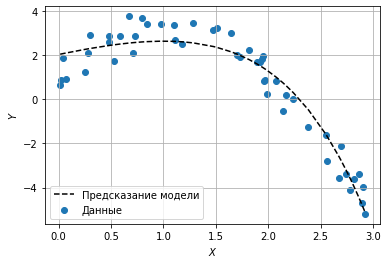

0.9239837705848348


0.9239837705848348

In [81]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X_poly_scaled,
    y=y_true
)
y_pred = predict(X_poly_scaled, new_W)
plot_model(X_data, y_pred, y_data)
r2_score(y_true, y_pred)

> Не забывайте важную вещь! При введении шага стандартизации все данные, поступаемые для получения предсказаний, должны быть стандартизованы. То есть, процесс обычно происходит так: обучающие данные стандартизуются, вычисленные средние и стд. отклонения для признаков сохраняются и далее новые данные стандартизуются уже по сохраненным параметрам.

Как видно, обучение со стандартизованными значениями признаков проходит без расходящегося градиента даже при исходном значении коэффициента обучения.

## Задание

Реализуйте и проверьте работоспособность стандартизации минмакс:
$$
X_{standardized}=\frac{X-X_{min}}{X_{max}-X_{min}}
$$

In [82]:
def minmax_feature_scale(X):
    X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    # TODO - код масштабирования по принципу minmax
    print(X_scaled)
    return X_scaled

In [83]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = minmax_feature_scale(X)

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[0.        , 0.        ],
                  [0.33333333, 0.33333333],
                  [0.66666667, 0.66666667],
                  [1.        , 1.        ]])
    )
)

[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [84]:
# TODO - обучите модель и проверьте предсказания

# Стандартизация для линейной регрессии (важность признаков)

Стандартизация имеет не только влияние на процесс обучения, но и важна для модели линейной регрессии и ее применения. Как помнится, модель линейной регрессии представляет собой сумму значений признаков, умноженных на веса. Для примера возьмем модель с двумя признаками и нулевым смещением ($w_0=0$).

$$
y = 2*x_1 + 20*x_2
$$

Идеологически назначение весов в линейной регрессии в том, чтобы показать, какой вклад составляет каждый признак в предсказание. Без знания и описания данных, на которых обучена модель, можно лишь сказать, что признак $x_2$ имеет в 10 раз больший вклад (важность) в результат предсказания, нежели $x_1$.

Теперь приложим больше подробностей:
- Зависимая переменная $y$ - количество баллов на экзамене $[0; 100]$;
- Признак $x_1$ - количество выполненных заданий $[0; 40]$;
- Признак $x_2$ - отношение количества посещений к количеству прошедших занятий $[0; 1]$.

Попробуем представить пример таких данных:



In [85]:
W = [2, 20]

X = np.random.uniform(low=0, high=[40, 1], size=(15, 2))
X[:, 0] = X[:, 0].astype(int)
y_true = np.clip(X.dot(W)+np.random.randn(15)*3, 0, 100)

df = pd.DataFrame(X[:,:2], columns=['tasks_completed', 'class_attended_rate'])
df['grade'] = y_true

df

,tasks_completed,class_attended_rate,grade
0,12.0,0.979511,45.094491
1,7.0,0.017161,17.525138
2,30.0,0.806913,74.131335
3,13.0,0.464674,32.689224
4,25.0,0.048059,49.326066
5,37.0,0.886680,87.931461
6,10.0,0.015305,20.636990
7,37.0,0.501040,82.730722
8,21.0,0.683964,59.369909
9,24.0,0.943892,63.004159


Что можно отметить: те студенты, которые почти не ходили на занятия, но выполнили большое количество заданий получили высокую оценку. Обратная ситуация, были на всех занятиях, но при этом выполнили мало задач - никто не получил хорошей оценки.

При этом, показатель R2 говорит об отличном соответствии модели данным. Так в чем проблема?

In [86]:
y_pred = X.dot(W)
r2_score(y_true, y_pred)

0.9826541062331413


0.9826541062331413

Проблема заключается в том, что даже при супер-точных предсказаниях, модель не отражает реальной зависимости. Она отражает зависимости в данных, которые имеют разные распределения (или как минимум диапазоны), что приводит к ошибочному выводу о том, что посещение занятий в 10 раз важнее, чем количество задач на экзамене.

Веса признаков отражают важности этих признаков, поэтому при построении модели нужно всегда учитывать распределение признаков.

In [87]:
X_scaled = standardize_features_scale(X)

new_W, _ = fit_model(
    lr=0.01,
    n_iter=3000,
    X=X_scaled,
    y=y_true
)

y_pred = predict(X_scaled, new_W)
new_W, r2_score(y_true, y_pred)

[[-1.00962508  1.16908101]
 [-1.4770441  -1.80895999]
 [ 0.67308339  0.63496879]
 [-0.91614128 -0.42410833]
 [ 0.20566437 -1.71334505]
 [ 1.32747002  0.88181324]
 [-1.19659269 -1.81470522]
 [ 1.32747002 -0.31157161]
 [-0.16827085  0.25449599]
 [ 0.11218056  1.05885637]
 [ 1.32747002  0.82152686]
 [ 0.20566437  0.61651386]
 [ 0.39263198 -0.08775141]
 [-1.66401171  0.64824813]
 [ 0.860051    0.07493736]]
Data shape: (15, 2)
Start weights: [0. 0. 0.]
Result weights: [57.29326909 21.53810823  5.95366071]
[57.29326909 21.53810823  5.95366071]
0.9832343246501896


(array([57.29326909, 21.53810823,  5.95366071]), 0.9832343246501896)

Как видно, модель, обученная после стандартизации отражает другое отношение весов при признаках $x_1$ (21.5) и $x_2$ (5.9), что больше коррелирует с реальной зависимостью.

> Именно по этой причине очень важно всегда стараться разобраться в данных, признаках и зависимостях, чтобы интерпретировать данные правильно. Плохое понимание данных может составить дополнительные сложности как в обучении, так и в разборе модели.

# Выводы - задание

Напишите выводы по итогам изучения материала. Вам может помочь следующий список вопросов, но лучше еще и добавить свои умозаключения!

- Почему лучше использовать большое количество данных?

Потому что присваивая оценку какому-то набору данных, нужно оценить их в целом, а если взять совсем немного данных, не получится сделать корректную оценку, т.к. будет видна часть общей картины.

- Что такое обучение модели и зачем это нужно? 

Обучение - процесс изменения параметров (веса модели) так, чтобы модель работала "хорошо", описывала зависимость данных. Оно нужно для прогнозирования зависимой величины от независимых параметров.

- Что лучше визуальная оценка работы системы или численная? Почему? 

Надо смотреть и по визуально, и по численной. Так вероятность оценить работу системы намного выше.

- В чём заключается задача оптимизации? Почему оптимизация нужна? 

Задача оптимизации - поиск экстремума (оптимума) по определенному критерию (функции потерь). Оптимизация нужна, чтобы модель предсказывала наиболее точно.

- Что за функция потерь и что она теряет? Может быть вообще эта функция только усложняет жизнь? 

Функция потерь J должна отражать, насколько хорошо предсказывает модель то есть разницу между спрогнозированным и данным результатами, а ее надо минимизировать.

- Что такое градиентный спуск и градиентный подъём? Существует ли градиентное плато?

Градиентный спуск - хотим двигаться к минимуму функции (минимизация), поэтому для уменьшения значения функции от аргумента отнимаем значение производной.

Градиентный подъем - хотим двигаться к максимуму функции (максимизация), поэтому для увеличения значения функции к аргументу прибавляем значени производной.

Градиентное плато существует в случае, когда значение целевой функции не изменяются (проблема зависания)

- Какие эффекты могут произойти при работе с данными? Как их вовремя распознать? А нужно ли их распознавать, может и так сойдёт? 

Underfit - эффект, когда сложность модели меньше, чем требуемая для описания данных.

Overfit - модель слишком сложная, нежели требуется для описания данных. Подход hold-out - метод распознавания, при котором происходит разделение всей выборки на обучающую и тестовую выборки в соотношении 70/30 или 80/20. 

Проверку надо делать, чтобы не получить большую разницу между данными исходными и после обучения.




# Вопросы

Ответив на них вы точно можете считать себя джедаем этой темы!

- Что такое зависимость в данных? 

При увеличении одной независимой переменной, изменяется значение зависимой переменной. Зависимость можно выразить аналитически.

- Как можно описать линейный характер распределения данных? 

При помощи прямой или в терминах весов: y = W0+W1x

- Что такое задача определения регрессии? 

Опреление аналитического описания (формулы) зависимости зависимой переменной y от независимых переменных x 

- Что такое модель в машинном обучении? 

Более общее понятие функции/алгоритма, с помощью чего описываем зависимость данных.

- Что такое обучение модели и зачем это нужно? 

Процесс изменения параметров (весов модели) так, чтобы модель воспроизводила даные с минимальной ошибкой. 

- Опишите процесс работы с данными и моделью, начиная от получения данных и заканчивая получением предсказания. 

Импорт данных, обработка, выделение зависимых и независимых переменных, стандартизация признаков, выбор модели обучения, оценка с помощью метрик, выбор метода оптимизации, обучение, сравнение метрик, выводы

- Почему вес важен в машинном обучении?  

Вес нужен, чтобы выделять важность признаков относительно друг друга.

- Какие метрики работают по правилу “меньше значение метрики - лучше модель работает”?

MSE, RMSE, MAE

- В каком случае лучше применять метрику квадратичного отклонения? 

Возводит значения ошибок в квадрат, поэтому сильнее реагирует на большие ошибки, так что его лучше применять в случае, когда большие ошибки нежелательны. Малые отклонения, возведенные в квадрат, наоборот становятся еще меньше.

- В чём заключается задача оптимизации?

В поиске экстремума по определенному критерию

- Что такое “определение градиента”? 

Определение направления наискорейшего возрастания или убывания определенного параметра.

- Опишите что происходит при градиентном расхождении? 

Такой эффект, когда пытаемся двигаться к уменьшению функции, а из-за большого значения градиента перемещения наоборот увеличивает значение функции.

- Опишите эффект underfit? Приведите пример 

Только что был этот вопрос. Пример: попытка описать зависимость 2 порядка между данными 1 порядка.

- В чём особенности метрики R2? 

Имеет верхний предел 1.0, который достигается в случае, если отклонения предсказаний всегда равны нулю. Нижний предел не ограничивается.

